# Simulation of Backpropagation Neural Network
#### Load data, use PyTorch packages to perform the algorithm, plot loss function of training vs validation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection

In [3]:
# 4 main features: sepal_length----sepal_width----petal_length----petal_width
## 3 classes:Iris Setosa----Iris Versicolor----Iris Verginica
## 50 instances for each class
#The performance of the network is evaluated by plotting the error versus the number of iterations,
#furthermore by testing the network with different samples of the iris flower data. 
#The successfully trained network classified the testing data correctly; indicating 100% recognition

In [4]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


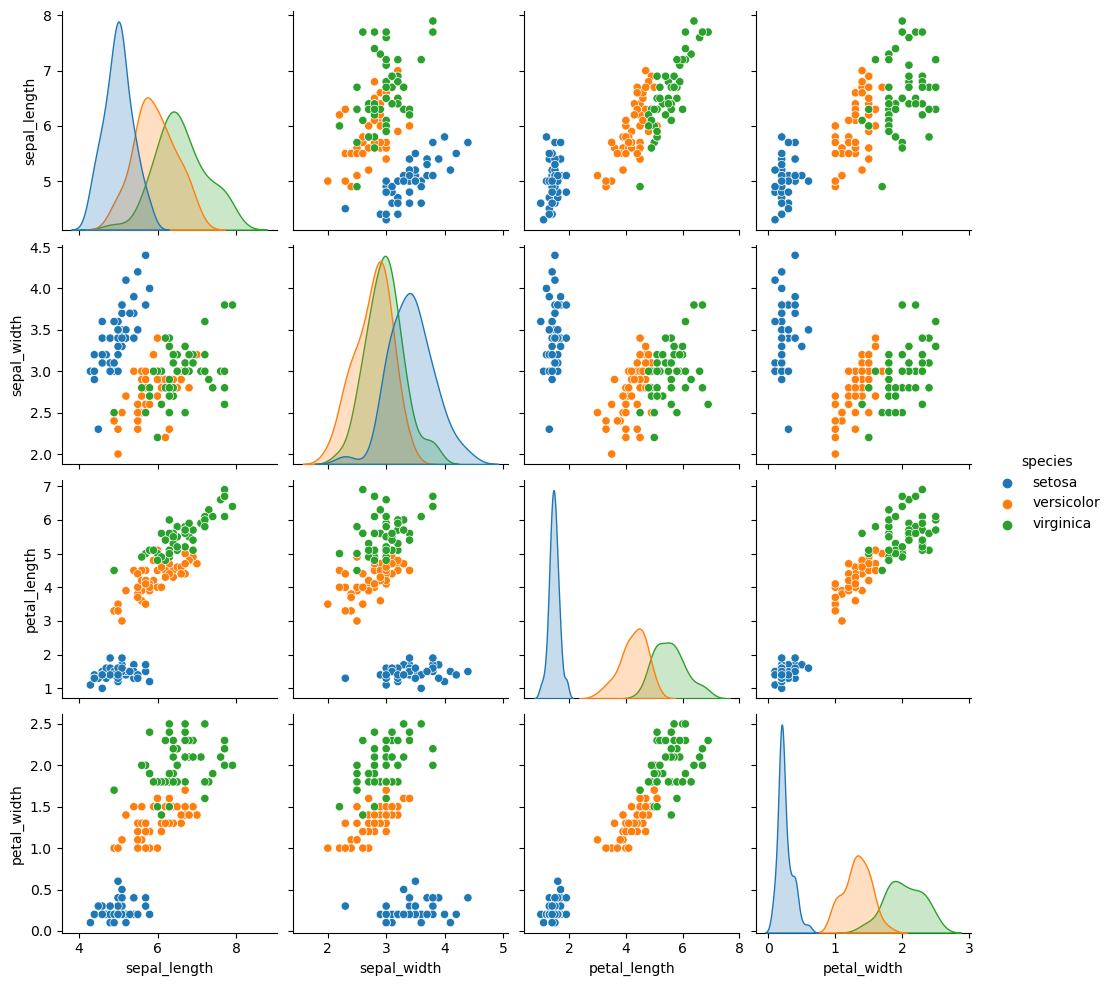

In [5]:
g = sns.pairplot(iris, hue="species")
## METHOD ONE: Patrick S Hoey: plot classes into scatter plots to determine patterns between the classes 
## so arrive at a prediction

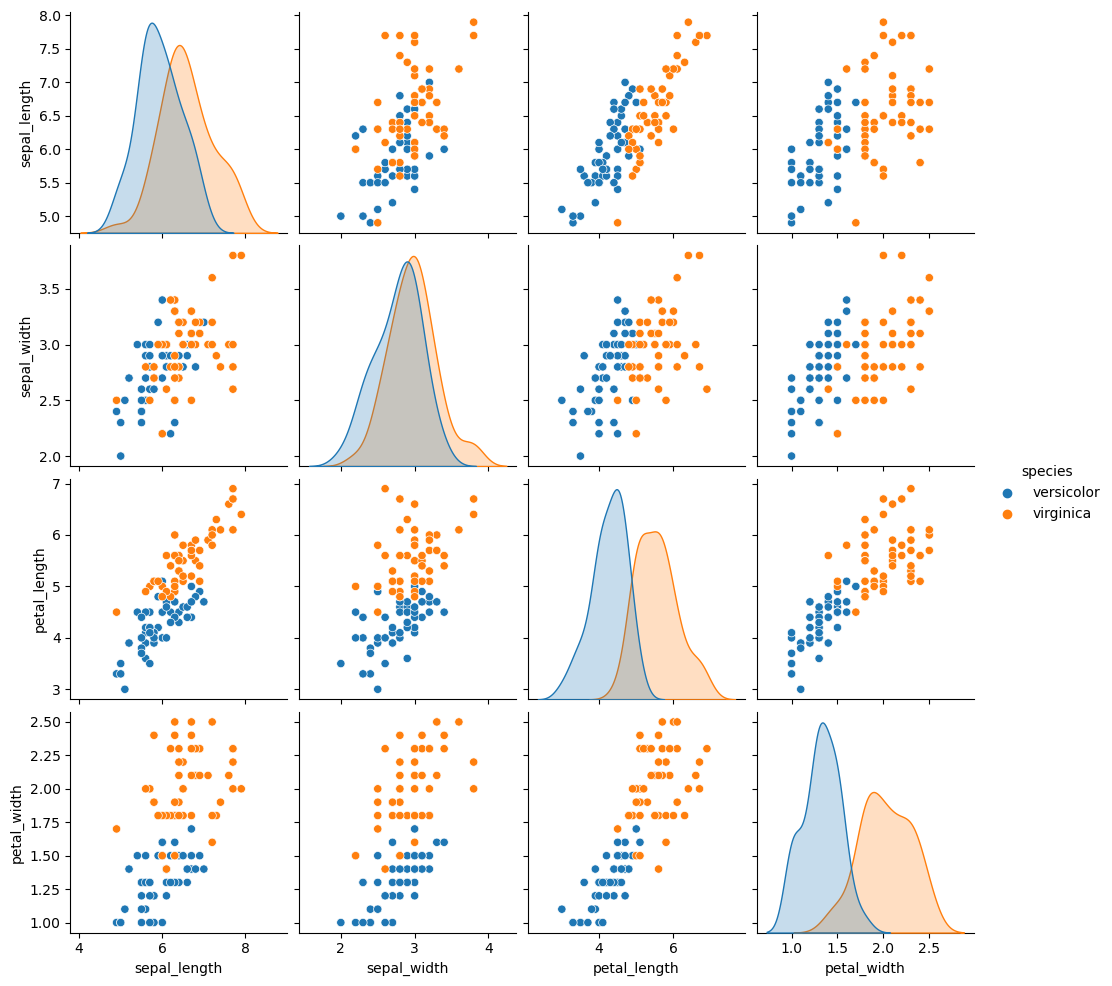

In [6]:
df = iris[iris.species != "setosa"] #extract dataframe that is not in class I.Setosa
g = sns.pairplot(df, hue="species")

In [7]:
df.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica


In [8]:
df_iris = df.copy()
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [9]:
df_iris["species_n"] = iris["species"].map({'versicolor':1.0, 'virginica':2.0})
## Output target of the ANN in decimal binary form
## Assume I.Setosa is the linearly seperable class, so reproduce data without it

In [10]:
## divide data so it can be labelled
## divide into sepals and petals
## X:sepals Y:petals
X_iris = np.asarray(df_iris.loc[:, ['sepal_length', 'sepal_width']], dtype=np.float32)
Y_iris = np.asarray(df_iris.loc[:, ['petal_length', 'petal_width']], dtype=np.float32)
label_iris = np.asarray(df_iris['species_n'], dtype=int)

In [11]:
#X_iris[0]
#Y_iris[0]
#label_iris[0]
#df_iris.sample()

In [12]:
#df_iris.drop(columns=["species_label"], inplace=True)
df_iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species,species_n
110,6.5,3.2,5.1,2.0,virginica,2.0


In [13]:
#Scale
from sklearn.preprocessing import StandardScaler
scalerx, scalery = StandardScaler(), StandardScaler()
X_iris = scalerx.fit_transform(X_iris)
Y_iris = StandardScaler().fit_transform(Y_iris)

In [14]:
#X_iris[0] ## X:sepals Y:petals
##7, 3.2 standard scaling
#Y_iris[0]
##4.7, 1.4 standard scaling

In [15]:
# Split train test of only 2 of the classes
X_iris_train, X_iris_test, Y_iris_train, Y_iris_test, label_iris_train, label_iris_test = \
 sklearn.model_selection.train_test_split(X_iris, Y_iris, label_iris, train_size=0.5, stratify=label_iris)
## Stratify is used to keep the same proportions as the initial dataset
## Stratification is defined as the act of sorting data, people, and objects into distinct groups or layers.

In [16]:
## multi-layered feed-forward networks (Figure 2.0) that are trained using 
## back-propagation training algorithms.

##### The goal of this work is to use an Artificial Neural Network to classify a specimen into its category using the above mentioned four features. This is done by using Multilayer Perceptron (MLP) feedforward network using backpropagation training algorithm.

In [17]:
# df_iris["species_n"] = iris["species"].map({'versicolor':1.0, 'virginica':2.0})
# Output target of the ANN in decimal binary form
# Assume I.Setosa is the linearly seperable class, so reproduce data without it
## Training inputs: X_iris_train(50, 2), Y_iris_train(50, 2) ---train_size is 50% of data
## Target outputs: label_iris_train(50,1)
## Test inputs: X_iris_test(50, 2), Y_iris_test(50, 2)
## Test outputs: label_iris_test(50,1)

In [18]:
#label_iris_test.shape

In [19]:
# input layer: a single layer containing 2 nonprocessing neurons, one for X:sepals, one for Y:petals
# output layer: a single layer containing 1 processing neuron, for either class 1 or class 2
# hidden Layer: one hidden layer is used. The number of neurons in hidden layers is experimented. SUM SQUARED ERROR(SSE)
# activation function: at each processing neuron an activation function is required 
# weights: RANDOMLY INITIALISED weights between input and hidden layer neurons, hidden to output layer neurons
# bias : RANDOMLY INITIALISED hidden layer bias
# epochs: The number of iterations is also experimented. Plot:X:epochs VS Y:SSE 

## PyTorch NN Package: updated code is under bold subtitle

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import tensorflow as tf

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #Fully connected: torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)
        #1 input layer
        #1 hidden layer
        #1 output layer
        #no bias
        #ReLU activation function
        self.fc_in = nn.Linear(2, 100, False) ## X, Y 2 inputs ; 100 output vectors (50% train, 50% test)
        self.fc_hid = nn.Linear(100, 50, False)## if hidden layer contains only 2 neurons (100/2)
        self.fc_out = nn.Linear(50, 1, False)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        #tensors to compute forward pass
        #flatten x
        out = torch.flatten(x, 1)
        #pass through first non-processing layer
        out =  self.fc_in(x)
        #ReLU activation function at hidden layer
        out =  self.relu(self.fc_hid(out))
        #ReLU activation function at output layer
        out =  self.relu(self.fc_out(out))
        out = torch.flatten(out, 1)
        
        return out

In [ ]:
def train_network(x, y):
    forward_out = my_nn.forward(x)
#no of weights =(inputs * first hidden layer) + ((nth -1)hidden layer * (nth)hidden layer) + ((nth)hidden layer * output)
#(2*2)+(2*1) = 6
    a = torch.randn((), requires_grad=True)
    b = torch.randn((), requires_grad=True)
    '''c = torch.randn((), requires_grad=True)
    d = torch.randn((), requires_grad=True)
    e = torch.randn((), requires_grad=True)
    f = torch.randn((), requires_grad=True)'''

    learning_rate = 1e-6
    for t in range(2000):
        # Forward pass: compute predicted y using operations on Tensors.
        y_pred = a + b * forward_out #+ (c * (forward_out)**2) + (d * (forward_out)**3) + (e * (forward_out)**4) + (f * (forward_out)**5)
    
    #SSE loss
    print("The loss is, among all 2000 epochs:")
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())
    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        '''c -= learning_rate * c.grad
        d -= learning_rate * d.grad
        e -= learning_rate * e.grad
        f -= learning_rate * f.grad'''

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        '''c.grad = None
        d.grad = None
        e.grad = None
        f.grad = None'''
    return y_pred  ##Iris classification is linear

### UPDATED: to solve array/tensor dimension issues, start with types of X, Y and labels  

In [85]:
type(X_iris_train) ##numpy array
type(Y_iris_test) ##numpy array
Y_iris_train.shape ##50 training vectors composed of 2 features
#so first step is to convert from numpy array to 1D tensors

(50, 2)

In [86]:
X_train = torch.from_numpy(X_iris_train)
Y_train = torch.from_numpy(Y_iris_train)
X_test = torch.from_numpy(X_iris_test)
Y_test = torch.from_numpy(Y_iris_test)

In [87]:
#X_train ##50 2D tensors

### UPDATED: the aim is to simulate the algorithm with X then compare between y_predicted and Y. This method can classify iris species from X

In [88]:
#set basic attributed of torch before designing, it should run on cpu with type float
dtype = torch.float
device = torch.device("cpu")

In [89]:
#the second step is to start designing the network
## input dimension (2 nonprocessing input neurons)
input_dim = X_iris_train.shape[1]
## batch size, the number of vectors (50% train, 50% test)
batch_size = X_iris_train.shape[0]
## hidden layer inputs, if hidden layer contains 2 neurons
hidden_dim = X_iris_train.shape[0]*2
## output dimension (1 processing output neuron) 
output_dim = Y_iris_train.shape[1]

'''
[[a,b],[c,d]...n]           X---->H----
                                  |   |
                [[a,b],[c,d]...2n]|   |--->O [[a,b],[c,d]...]
                                  |   |
[[a,b],[c,d]...n]           Y---->H----

'''

'\n[[a,b],[c,d]...n]           X---->H----\n                                  |   |\n                [[a,b],[c,d]...2n]|   |--->O [[a,b],[c,d]...]\n                                  |   |\n[[a,b],[c,d]...n]           Y---->H----\n\n'

In [90]:
## bias = 0 initially and weights are randomised. learning rate is det to default 1e-6
## gradients shall be calculated by torch.autograd
a = torch.randn(input_dim, hidden_dim, device=device, dtype=dtype, requires_grad=True)
b = torch.randn(hidden_dim, output_dim, device=device, dtype=dtype, requires_grad=True)
learning_rate = 1e-6

In [91]:
## ReLU activation function
#design the neural network as a sequence of layers
my_nn_seq = nn.Sequential(
                nn.Linear(input_dim, hidden_dim, True),
                nn.ReLU(),
                nn.Linear(hidden_dim, output_dim, True)
            )

In [97]:
my_nn_seq

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=2, bias=True)
)

In [98]:
# set forward pass using minimised Euclidean distance

In [99]:
#find losses of training: method 1 using MSE(mean squared error); set reduction="mean" 
## method 2 using SSE(sum squared error); set reduction="sum"
## reduction (str, optional) 
##'none': no reduction will be applied
##'mean': the sum of the output will be divided by the number of elements in the output 
##'sum': the output will be summed.
SSE_loss = nn.MSELoss(reduction='sum')
training_losses = list()
test_losses = list() ##list objects (error:'Tensor' object has no attribute 'append')

### UPDATED: to solve matrix multiplication issues (error: mat1 and mat2 cannot be multiplied), start with torch.mm

In [100]:
## epochs number
epochs = 2000
for training in range(epochs):
    y_pred = my_nn_seq(X_train)
    #calculate overall loss
    training_loss = SSE_loss(y_pred, Y_train)
    # set backward pass gradients to zero
    my_nn_seq.zero_grad()
    ##use autograd
    training_loss.backward()
    # update the weights using gradient descent and autograd
    # try with test 
    with torch.no_grad():
        for param in my_nn_seq.parameters():
            param -= learning_rate * param.grad
        y_pred_test = my_nn_seq(X_test)
        test_loss = (y_pred_test - Y_test).pow(2).sum() ##SSE
    
    if training % 10 == 0:
        print(training, loss.item(), test_loss.item()) ##find scalar so that you can plot it
    
    training_losses.append(training_loss.item())
    test_losses.append(test_loss.item())

0 145.58914184570312 154.3869171142578
10 145.58914184570312 152.20382690429688
20 145.58914184570312 150.07725524902344
30 145.58914184570312 148.0055694580078
40 145.58914184570312 145.98719787597656
50 145.58914184570312 144.0205535888672
60 145.58914184570312 142.10418701171875
70 145.58914184570312 140.23660278320312
80 145.58914184570312 138.41644287109375
90 145.58914184570312 136.64230346679688
100 145.58914184570312 134.9128875732422
110 145.58914184570312 133.2269287109375
120 145.58914184570312 131.58316040039062
130 145.58914184570312 129.9803924560547
140 145.58914184570312 128.41748046875
150 145.58914184570312 126.89326477050781
160 145.58914184570312 125.40666198730469
170 145.58914184570312 123.95661163330078
180 145.58914184570312 122.5420913696289
190 145.58914184570312 121.16206359863281
200 145.58914184570312 119.81560516357422
210 145.58914184570312 118.50177001953125
220 145.58914184570312 117.21965026855469
230 145.58914184570312 115.96835327148438
240 145.58914

In [68]:
#training_loss ##Example: tensor(81.9194, grad_fn=<MseLossBackward0>) 

tensor(81.9194, grad_fn=<MseLossBackward0>)

In [69]:
#my_nn_seq.parameters() ##Example: <generator object Module.parameters at 0x0000021184B0AF90>

In [70]:
#test_loss ##Example: tensor(95.1073) 

<generator object Module.parameters at 0x0000021184B0AF90>

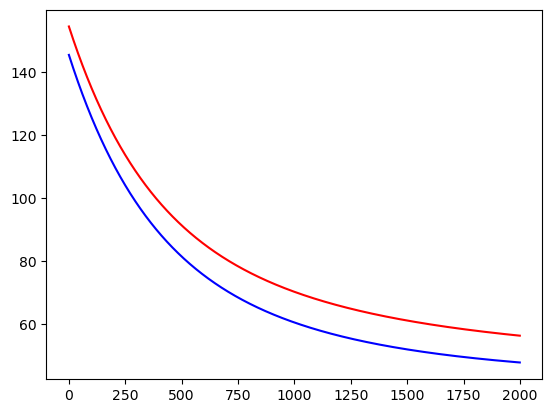

In [101]:
plt.plot(np.arange(len(training_losses)), training_losses, "-b", np.arange(len(test_losses)), test_losses, "-r")

## PyTorch Optim Package : updated code is under bold subtitle

In [103]:
#type(criterion)----torch.nn.modules.loss.CrossEntropyLoss
#forward_out.shape----torch.Size([50, 1])

In [104]:
def train_network_optim(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses):
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        #how are bias and weights updated
        learning_rate = 1e-6
        #forward feed
        output_train = model(X_train)

        #calculate the loss
        loss_train = criterion(output_train, y_train)

        #backward propagation: calculate gradients
        loss_train.backward()

        #update the weights
        optimizer.step()
        
        output_test = model(X_test)
        loss_test = criterion(output_test,y_test)

        train_losses[epoch] = loss_train.item()
        test_losses[epoch] = loss_test.item()

        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")

In [105]:
num_epochs = 1000
train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)

In [106]:
##########ISSUE WITH DIMENSION OF TENSOR
#train_network_optim(my_nn,optimizer,criterion,X_iris_train,
#              Y_iris_train,X_iris_test,Y_iris_test,num_epochs,train_losses,test_losses)

### UPDATED: just add optimiser  

In [115]:
import torch.optim as optim

In [116]:
loss_opt = nn.MSELoss(reduction='sum')
losses_training, losses_test = list(), list()

In [117]:
# method 1 :use Adam optimiser ##uncomment
# method 2: use SGD (Stochastic Gradient Descent)
adam_optimiser = optim.Adam(my_nn_seq.parameters(), lr=learning_rate)
sgd_optimiser = optim.SGD(my_nn_seq.parameters(), lr=learning_rate)

In [120]:
for e in range(epochs):
    y_pred = my_nn_seq(X_train)
    loss_training = loss_opt(y_pred, Y_train)
    
    adam_optimiser.zero_grad()
    #sgd_optimiser.zero_grad()
    
    loss_training.backward()

    adam_optimiser.step()
    #sgd_optimiser.step()
    
    with torch.no_grad():
        y_pred = my_nn_seq(X_test)
        loss_test = loss_opt(y_pred, Y_test)

    if e % 10 == 0:
        print(e, loss_training.item(), loss_test.item())

    losses_training.append(loss_training.item())
    losses_test.append(loss_test.item())

0 42.81909942626953 49.539222717285156
10 42.81520080566406 49.53302001953125
20 42.81130599975586 49.52682876586914
30 42.80741500854492 49.520652770996094
40 42.80353546142578 49.514495849609375
50 42.79967498779297 49.50835037231445
60 42.795814514160156 49.502235412597656
70 42.791969299316406 49.49613571166992
80 42.78812789916992 49.490055084228516
90 42.7843017578125 49.484004974365234
100 42.780487060546875 49.47795867919922
110 42.77667999267578 49.47193908691406
120 42.77288055419922 49.4659423828125
130 42.76908874511719 49.459957122802734
140 42.76531219482422 49.45399475097656
150 42.76154327392578 49.44805145263672
160 42.75777816772461 49.44212341308594
170 42.7540283203125 49.43621826171875
180 42.750282287597656 49.430320739746094
190 42.74654769897461 49.42445373535156
200 42.74282455444336 49.41859817504883
210 42.73910903930664 49.41277313232422
220 42.73540496826172 49.406959533691406
230 42.73170471191406 49.401161193847656
240 42.7280158996582 49.395381927490234


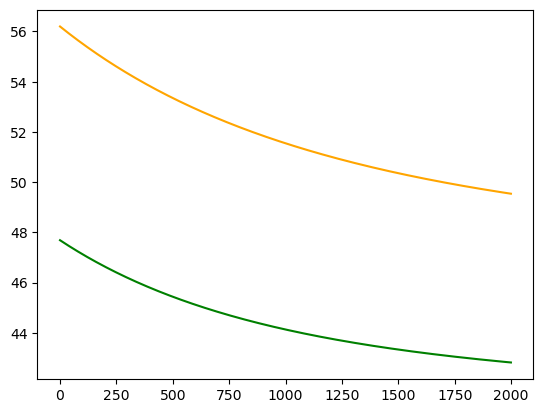

In [119]:
## SGD
plt.plot(np.arange(len(losses_training)), losses_training, "green", np.arange(len(losses_test)), losses_test, "orange")

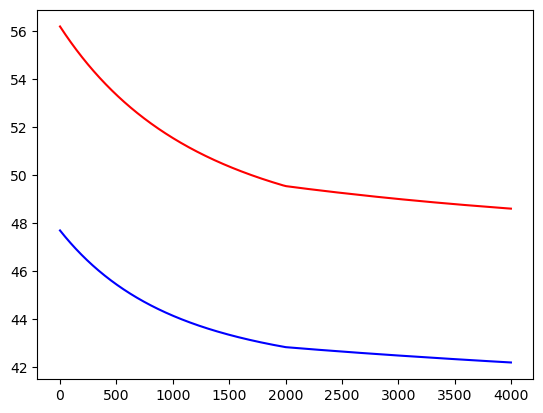

In [121]:
## ADAMS
plt.plot(np.arange(len(losses_training)), losses_training, "blue", np.arange(len(losses_test)), losses_test, "red")